In [200]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.datasets import load_iris


In [201]:
# importing data
df = pd.read_csv('car_prices.csv')
#df.drop(' ', inplace = True,axis=1)

print(df.head())
#print(df.columns)
#print(df)
#print(df.columns)




   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [202]:
#Checking for missing values

df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [203]:
#Total number of null values

df.isnull().sum().sum()

123376

In [204]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
558833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [205]:
df2 = df.dropna()
df2

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [206]:
df2.drop_duplicates()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [207]:
#Displaying all the states


print(df2['state'].unique())

['ca' 'tx' 'mn' 'az' 'wi' 'tn' 'md' 'pa' 'fl' 'ne' 'oh' 'mi' 'nj' 'va'
 'sc' 'in' 'il' 'co' 'ut' 'mo' 'ga' 'nv' 'ma' 'pr' 'nc' 'ny' 'or' 'la'
 'wa' 'hi' 'ok' 'ms' 'nm' 'al']


In [208]:
#Displaying all the makes

print(df2['make'].unique())

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Plymouth'
 'Tesla' 'Aston Martin' 'Geo' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']


In [209]:
#Displaying all the models
print(df2['model'].unique())

['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' 'Altima' 'M5' 'Cruze'
 'A4' 'Camaro' 'A6' 'Optima' 'Fusion' 'Q5' '6 Series' 'Impala' '5 Series'
 'A3' 'XC70' 'SQ5' 'S5' 'Suburban' 'ELR' 'V60' 'X6' 'ILX' 'K900' 'Malibu'
 'RX 350' 'Versa' 'Elantra' 'Versa Note' 'A8' 'X1' 'Enclave' 'TTS'
 '4 Series' 'MDX' 'Silverado 1500' 'SRX' 'X5' 'G Coupe' 'G Sedan' 'FX'
 'Santa Fe' 'Genesis' 'Equus' 'Sonata' 'Sonata Hybrid' 'Accent' 'Veloster'
 'Elantra Coupe' 'Azera' 'Tucson' 'Genesis Coupe' 'Wrangler' 'S-Class'
 'GS 350' 'Outlander' 'C-Class' 'Mazda2' 'Rio' 'M' '370Z' 'Soul'
 'Outlander Sport' 'SLK-Class' 'ES 350' 'E-Class' 'Mazda3'
 'Cooper Clubman' 'Cooper' 'CX-9' 'Forte' 'Compass' 'JX' 'LR4' 'Mazda5'
 'Range Rover Evoque' 'LS 460' 'GLK-Class' 'Sportage' 'Grand Cherokee'
 'MKX' 'XF' 'GL-Class' 'M-Class' 'Cooper Countryman' 'Lancer'
 'Range Rover Sport' 'Passat' 'Corolla' 'XC60' 'Sienna' 'Juke' 'Yaris'
 'NV' 'CC' 'Leaf' 'Camry' 'Tacoma' 'Jetta' 'Impreza WRX' 'FJ Cruiser'
 'Beetle' 'Avalon' 'FR-S' 

In [210]:
print(df2)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [211]:
df2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

<Axes: xlabel='model', ylabel='mmr'>

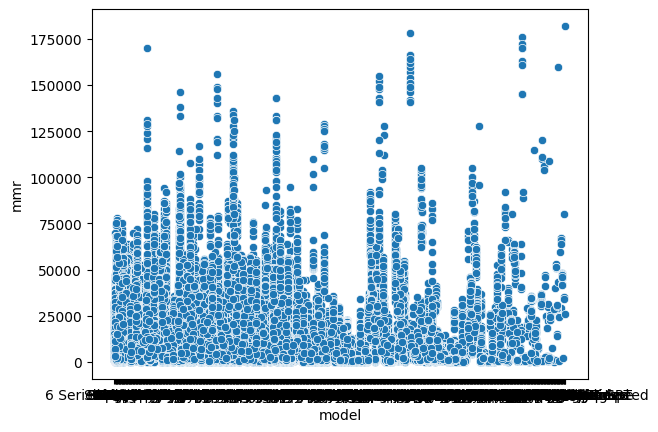

In [212]:
#sns.scatterplot(x='model',
               # y='mmr', data=df)

sns.scatterplot(x='model',
                y='mmr', data=df2)

In [213]:
df2.drop(['transmission', 'vin', 'interior', 'saledate', 'seller', 'condition', 'color', 'trim'], axis= 1)

,year,make,model,body,state,odometer,mmr,sellingprice
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0
1,2015,Kia,Sorento,SUV,ca,9393.0,20800.0,21500.0
2,2014,BMW,3 Series,Sedan,ca,1331.0,31900.0,30000.0
3,2015,Volvo,S60,Sedan,ca,14282.0,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,ca,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,Sedan,fl,66403.0,20300.0,22800.0
558833,2012,Ram,2500,Crew Cab,wa,54393.0,30200.0,30800.0
558834,2012,BMW,X5,SUV,ca,50561.0,29800.0,34000.0
558835,2015,Nissan,Altima,sedan,ga,16658.0,15100.0,11100.0


In [214]:
df2 = df.dropna()
df2.drop_duplicates()
df2.drop(['transmission', 'vin', 'interior', 'saledate', 'seller', 'condition', 'color', 'trim'], axis= 1)

,year,make,model,body,state,odometer,mmr,sellingprice
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0
1,2015,Kia,Sorento,SUV,ca,9393.0,20800.0,21500.0
2,2014,BMW,3 Series,Sedan,ca,1331.0,31900.0,30000.0
3,2015,Volvo,S60,Sedan,ca,14282.0,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,ca,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,Sedan,fl,66403.0,20300.0,22800.0
558833,2012,Ram,2500,Crew Cab,wa,54393.0,30200.0,30800.0
558834,2012,BMW,X5,SUV,ca,50561.0,29800.0,34000.0
558835,2015,Nissan,Altima,sedan,ga,16658.0,15100.0,11100.0


In [215]:
df2 = df.dropna()
df3 = df2.drop_duplicates()
#df3 = df2.drop(['transmission', 'vin', 'interior', 'saledate', 'seller', 'condition', 'color', 'trim'], axis= 1)

# Assuming 'df' is your DataFrame and 'Brand' is the column containing the categorical variable

# Convert categorical variable into dummy/indicator variables
#dummies = pd.get_dummies(df2['make'])

# Concatenate dummy variables with original DataFrame
#df3 = pd.concat([df, dummies], axis=1)

# Drop one dummy variable to avoid multicollinearity (optional
#df3 = df2.drop(columns=['make'])
df5 = df2.drop(['year', 'body','transmission', 'vin', 'interior', 'saledate', 'seller', 'condition', 'color'], axis= 1)
print(df5)
df6 = df5
df3 = df6



          make                model         trim state  odometer      mmr  \
0          Kia              Sorento           LX    ca   16639.0  20500.0   
1          Kia              Sorento           LX    ca    9393.0  20800.0   
2          BMW             3 Series   328i SULEV    ca    1331.0  31900.0   
3        Volvo                  S60           T5    ca   14282.0  27500.0   
4          BMW  6 Series Gran Coupe         650i    ca    2641.0  66000.0   
...        ...                  ...          ...   ...       ...      ...   
558831     BMW             5 Series         528i    fl   66403.0  20300.0   
558833     Ram                 2500  Power Wagon    wa   54393.0  30200.0   
558834     BMW                   X5    xDrive35d    ca   50561.0  29800.0   
558835  Nissan               Altima        2.5 S    ga   16658.0  15100.0   
558836    Ford                F-150          XLT    ca   15008.0  29600.0   

        sellingprice  
0            21500.0  
1            21500.0  
2     

In [216]:
#print(df3)
df4 = df3
df4

,make,model,trim,state,odometer,mmr,sellingprice
0,Kia,Sorento,LX,ca,16639.0,20500.0,21500.0
1,Kia,Sorento,LX,ca,9393.0,20800.0,21500.0
2,BMW,3 Series,328i SULEV,ca,1331.0,31900.0,30000.0
3,Volvo,S60,T5,ca,14282.0,27500.0,27750.0
4,BMW,6 Series Gran Coupe,650i,ca,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...
558831,BMW,5 Series,528i,fl,66403.0,20300.0,22800.0
558833,Ram,2500,Power Wagon,wa,54393.0,30200.0,30800.0
558834,BMW,X5,xDrive35d,ca,50561.0,29800.0,34000.0
558835,Nissan,Altima,2.5 S,ga,16658.0,15100.0,11100.0


In [217]:
#Converting the "make" column to a numerical column to be used in the regression model
#Category Variables
df3['make'] = df3['make'].astype('category')
df3['make'] = df3['make'].cat.codes
df3

,make,model,trim,state,odometer,mmr,sellingprice
0,24,Sorento,LX,ca,16639.0,20500.0,21500.0
1,24,Sorento,LX,ca,9393.0,20800.0,21500.0
2,3,3 Series,328i SULEV,ca,1331.0,31900.0,30000.0
3,51,S60,T5,ca,14282.0,27500.0,27750.0
4,3,6 Series Gran Coupe,650i,ca,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...
558831,3,5 Series,528i,fl,66403.0,20300.0,22800.0
558833,41,2500,Power Wagon,wa,54393.0,30200.0,30800.0
558834,3,X5,xDrive35d,ca,50561.0,29800.0,34000.0
558835,36,Altima,2.5 S,ga,16658.0,15100.0,11100.0


In [218]:
#Converting the other tables to categorical variables

df3['model'] = df3['model'].astype('category')
df3['model'] = df3['model'].cat.codes

df3['trim'] = df3['trim'].astype('category')
df3['trim'] = df3['trim'].cat.codes

df3['state'] = df3['state'].astype('category')
df3['state'] = df3['state'].cat.codes
df3

,make,model,trim,state,odometer,mmr,sellingprice
0,24,637,818,2,16639.0,20500.0,21500.0
1,24,637,818,2,9393.0,20800.0,21500.0
2,3,8,253,2,1331.0,31900.0,30000.0
3,51,575,1212,2,14282.0,27500.0,27750.0
4,3,33,335,2,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...
558831,3,25,316,4,66403.0,20300.0,22800.0
558833,41,6,926,32,54393.0,30200.0,30800.0
558834,3,722,1489,2,50561.0,29800.0,34000.0
558835,36,63,102,5,16658.0,15100.0,11100.0


In [219]:
#Dropping the Sellingprice column
x = df3.drop(columns = 'sellingprice')
x

,make,model,trim,state,odometer,mmr
0,24,637,818,2,16639.0,20500.0
1,24,637,818,2,9393.0,20800.0
2,3,8,253,2,1331.0,31900.0
3,51,575,1212,2,14282.0,27500.0
4,3,33,335,2,2641.0,66000.0
...,...,...,...,...,...,...
558831,3,25,316,4,66403.0,20300.0
558833,41,6,926,32,54393.0,30200.0
558834,3,722,1489,2,50561.0,29800.0
558835,36,63,102,5,16658.0,15100.0


In [220]:
#y is assigned the sellingprice column
y = df3['sellingprice']


In [221]:
#Splitting the data into training and testing
#30% of the data will be used for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [222]:
#Creating a linear regression model

lr = LinearRegression()

In [223]:
#Fitting the model to describe the relationship between a response variable and one or more predictor variables

lr.fit(x_train, y_train)

LinearRegression()

In [224]:
#This step displays the mean value
c = lr.intercept_
c

163.17072754052788

In [225]:
#A regression coefficient describes the size and direction of the relationship between a predictor and the response variable.
#Coefficients are the numbers by which the values of the term are multiplied in a regression equation

m = lr.coef_
m

array([ 1.14457414e-01,  4.92669384e-02, -3.16584655e-02, -3.79489727e+00,
       -1.22546729e-03,  9.87717159e-01])

In [226]:
#Predicting the selling price
y_pred_train = lr.predict(x_train)
print(y_pred_train)

[13571.9544586  17752.00852928  8174.61442045 ...  9331.15498949
 18602.50215    10530.69062891]


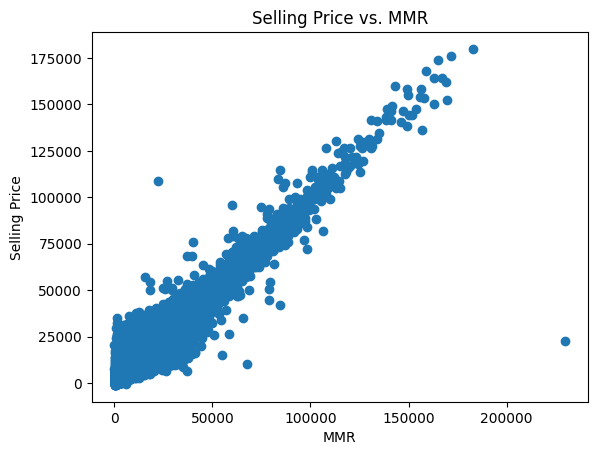

In [227]:
#Scatter Plot displaying the relationship between the training data and the predicted values.

plt.scatter(y_train, y_pred_train)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.show()

In [228]:
#r2_score is a regression function that returns the coefficient of determination R^2 of the prediction.

from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.9670767049927845

In [229]:
y_pred_test = lr.predict(x_test)

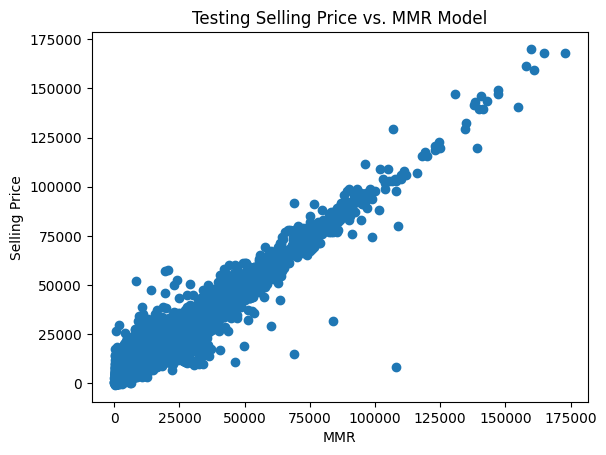

In [230]:
#Scatter Plot displaying the relatioship between the test data and the predicted data

plt.scatter(y_test, y_pred_test)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Testing Selling Price vs. MMR Model")
plt.show()

In [231]:
r2_score(y_test, y_pred_test)

0.9678385464085453

In [232]:
#Table displaying mmr, the predicted price, and the difference between the predicted price and the actual price


y_prediction = pd.DataFrame({'MMR': y_test, 'Predicted Price':y_pred_test, 'Difference': y_test - y_pred_test})
y_prediction

,MMR,Predicted Price,Difference
505635,6300.0,5988.683166,311.316834
87879,21100.0,21922.447147,-822.447147
325815,42000.0,42542.396891,-542.396891
555408,10500.0,9987.817591,512.182409
468113,30600.0,30852.349850,-252.349850
...,...,...,...
362690,26200.0,25195.511754,1004.488246
34670,10900.0,10148.847858,751.152142
341599,10700.0,11423.432394,-723.432394
218239,45800.0,44777.501177,1022.498823


In [233]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, y_pred_test))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, y_pred_test))


mean_squared_error :  2994099.123677701
mean_absolute_error :  1079.8497828258865


In [234]:
# # df3['state'] == 2
# df3.loc[df3['state'] == 2, 'state'] = 'ca'
# df3.loc[df3['state'] == 5, 'state'] = 'ga'
# df3.loc[df3['make'] == 24, 'make'] = 'kia'
# df3.loc[df3['make'] == '3', 'make'] = 'BMW'
# df3.loc[df3['model'] == 637, 'model'] = 'sorento'
# df3




In [235]:
#Display the predicted price for the test data

print(y_pred_test)

[ 5988.68316599 21922.44714748 42542.3968914  ... 11423.4323937
 44777.50117699  2585.88627074]


In [236]:
#Sample data for prediction

new_data = {
    'make': 24,
    'model': 637,
    'trim': 818,
    'state': 2,
    'odometer': 14639.0,
    'mmr': 15000.0
}

In [237]:
#Creating a dataframe to be used for the prediction

new_data_df = pd.DataFrame(new_data, index=[0])
new_data_df

,make,model,trim,state,odometer,mmr
0,24,637,818,2,14639.0,15000.0


In [238]:
#The result of the prediction

pred_result = lr.predict(new_data_df)
a = pred_result[0]
ans =a.round(2)
print(ans)

14961.63
